Ce notebook a pour objectif de faire quelques statistiques descriptives sur le dataframe DVF pour mieux visualiser les données et ensuite, de le coupler aux données de risques d'inondation pour avoir une base de données complète.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Partie 1 : Une première analyse

Tout de suite, nous allons observer rapidement le dataframe pour voir s'il y a des données manquantes et/ou des choses à corriger/ajouter

In [2]:
import pandas as pd

def charger_donnees(chemin_fichier):
    """
    Charge un fichier CSV dans un DataFrame pandas.
    :param chemin_fichier: Chemin du fichier CSV
    :return: DataFrame contenant les données du CSV
    """
    df = pd.read_csv(chemin_fichier)
    df['nombre_dependances'] = df['nombre_dependances'].fillna(0)
    return df

df_initial = charger_donnees("/home/onyxia/projet_statapp_inondations/DVFfinal.csv")


Ci-dessus, en chargeant la BDD, j'ai remplacé les NaN par des 0 dans la colonne des dépendances.

In [3]:

def statistiques_generales(df):
    """
    Renvoie des statistiques générales sur le DataFrame.
    :param df: DataFrame contenant les données
    :return: DataFrame avec les statistiques descriptives
    """
    return df.describe()

statistiques_generales(df_initial)

,Unnamed: 0,numero_disposition,valeur_fonciere,adresse_numero,code_postal,code_departement,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,prix_maison,nombre_dependances
count,115303.000000,115303.000000,1.152340e+05,114491.000000,115301.000000,115303.000000,115303.000000,115303.000000,115301.000000,113927.000000,113927.000000,1.152340e+05,115303.000000
mean,57651.000000,1.016131,2.898613e+05,895.889563,27535.861979,27.157264,99.266134,4.013087,589.264542,3.538192,43.570904,2.462188e+05,0.373208
std,33285.253381,0.136616,5.330753e+05,2095.946129,9338.339226,9.284346,44.053883,1.392382,2071.198546,0.737078,0.335817,2.637019e+05,1.186953
min,0.000000,1.000000,1.000000e+00,1.000000,11000.000000,11.000000,1.000000,0.000000,1.000000,1.705680,42.714337,4.405286e-02,0.000000
25%,28825.500000,1.000000,1.340000e+05,7.000000,30000.000000,30.000000,74.000000,3.000000,140.000000,3.038340,43.303353,1.210000e+05,0.000000
50%,57651.000000,1.000000,2.200000e+05,21.000000,30650.000000,30.000000,92.000000,4.000000,374.000000,3.603772,43.567320,2.100000e+05,0.000000
75%,86476.500000,1.000000,3.288000e+05,170.000000,34350.000000,34.000000,118.000000,5.000000,607.000000,4.132948,43.818203,3.150000e+05,0.000000
max,115302.000000,8.000000,4.199893e+07,9999.000000,34990.000000,34.000000,1340.000000,70.000000,68438.000000,4.832846,44.444393,4.199893e+07,160.000000


L'analyse ci-dessus n'a de sens que pour certaines variables. En particulier, la moyenne des codes postal n'a pas vraiment d'intérêt (ni même de sens...)


On remarque que le nombre maximal de dépendances est 160, cela semble étonnamment grand. Plus de 75% des transactions n'impliquent pas de dépendance


On voit ici l'importance d'exclure les valeurs extrêmes : On a une transaction à 4 centimes (?) et une autre dont la surface est 1 m². Ces transactions exceptionnelles n'apportent rien à l'analyse mais pourraient induire en erreur nos résultats.

In [4]:
df_initial.head(10)

,Unnamed: 0,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,nom_commune,code_departement,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,prix_maison,nombre_dependances
0,0,2019-202011,2019-07-01,1,Vente,161000.00,15.0,NaN,RUE PAUL GAUGUIN,0114,30620.0,Aubord,30,80.0,3.0,203.0,4.316416,43.759404,1.610000e+05,0.0
1,1,2019-202020,2019-07-04,1,Vente,539920.00,1781.0,NaN,RTE DE SAUVE,0136,30730.0,Parignargues,30,100.0,4.0,319.0,4.195975,43.859824,2.203755e+05,0.0
2,2,2019-202020,2019-07-04,1,Vente,539920.00,1781.0,NaN,RTE DE SAUVE,0136,30730.0,Parignargues,30,60.0,3.0,319.0,4.195975,43.859824,1.322253e+05,0.0
3,3,2019-202020,2019-07-04,1,Vente,539920.00,1821.0,NaN,RTE DE SAUVE,0136,30730.0,Parignargues,30,85.0,3.0,1533.0,4.195750,43.859556,1.873192e+05,0.0
4,4,2019-202021,2019-07-01,1,Vente,99000.00,5264.0,NaN,LA BOUISSONADE ET MONBLADI,B054,30750.0,Lanuéjols,30,84.0,3.0,2480.0,NaN,NaN,9.900000e+04,0.0
5,5,2019-202026,2019-07-01,1,Vente,228222.00,122.0,NaN,RTE DE MARIGNAC,0154,30700.0,Foissac,30,90.0,4.0,902.0,4.300402,44.045759,2.282220e+05,0.0
6,6,2019-202027,2019-07-01,1,Vente,380500.00,9.0,NaN,IMP DES SALADELLES,0465,30220.0,Aigues-Mortes,30,115.0,4.0,524.0,4.199704,43.572632,3.805000e+05,0.0
7,7,2019-202036,2019-07-05,1,Vente,1119600.00,2.0,NaN,IMP DE LA PHALENE,6169,30900.0,Nîmes,30,265.0,6.0,2106.0,4.296259,43.834871,1.119600e+06,1.0
8,8,2019-202045,2019-07-04,1,Vente,420800.25,10.0,NaN,CHE DU CIMETIERE VIEUX,0105,30980.0,Saint-Dionisy,30,108.0,3.0,772.0,4.228319,43.802425,4.208002e+05,0.0
9,9,2019-202047,2019-07-02,1,Vente,176000.00,5288.0,NaN,CHE DU MAS DE PIAN,0072,30350.0,Moulézan,30,85.0,4.0,499.0,4.124116,43.927754,1.760000e+05,0.0


In [4]:
def valeurs_manquantes(df):
    """
    Renvoie le nombre de valeurs manquantes par colonne.
    :param df: DataFrame contenant les données
    :return: Série avec le nombre de valeurs manquantes par colonne
    """
    return df.isnull().sum()


valeurs_manquantes(df_initial)

Unnamed: 0                        0
id_mutation                       0
date_mutation                     0
numero_disposition                0
nature_mutation                   0
valeur_fonciere                  69
adresse_numero                  812
adresse_suffixe              106905
adresse_nom_voie                  1
adresse_code_voie                 0
code_postal                       2
nom_commune                       0
code_departement                  0
surface_reelle_bati               0
nombre_pieces_principales         0
surface_terrain                   2
longitude                      1376
latitude                       1376
prix_maison                      69
nombre_dependances                0
dtype: int64

In [ ]:
Ci-dessus, on voit que les coordonnées GPS sont manquantes pour 1376 transactions,
il semble pertinent de les supprimer de la base car on ne pourra pas les étudier correctement (de même que les 69 transactions où le prix de vente est indisponible)

In [29]:
def mode_colonnes(df):
    """
    Renvoie le mode (valeur la plus fréquente) de chaque colonne.
    :param df: DataFrame contenant les données
    :return: Série avec le mode de chaque colonne
    """
    return df.mode().iloc[0]


mode_colonnes(df_initial)

Unnamed: 0                             0
id_mutation                  2021-132350
date_mutation                 2021-07-28
numero_disposition                   1.0
nature_mutation                    Vente
valeur_fonciere                 200000.0
adresse_numero                       1.0
adresse_suffixe                        B
adresse_nom_voie              LE VILLAGE
adresse_code_voie                   0020
code_postal                      34500.0
nom_commune                        Nîmes
code_departement                    34.0
surface_reelle_bati                 90.0
nombre_pieces_principales            4.0
surface_terrain                    500.0
longitude                       3.049139
latitude                       43.013674
prix_maison                     200000.0
nombre_dependances                   0.0
Name: 0, dtype: object

## Partie 2 : Un premier nettoyage

On vient de voir qu'il est nécessaire de supprimer certaines observations avant de pouvoir analyser plus précisément notre BDD. Ici, on va s'occuper de supprimer les observations où une information importante est indisponible. De même, on va rajouter la colonne prix_par_metre_carre qui nous servira de variables de références pour supprimer les observations atypiques.

In [9]:
def supprimer_lignes_vides(df):
    """
    Supprime les lignes où les variables prix_maison ou longitude ne sont pas définies.
    :param df: DataFrame contenant les données
    :return: DataFrame sans les lignes avec prix_maison ou longitude manquantes
    """
    df = df.dropna(subset=['prix_maison', 'longitude', 'surface_terrain'])
    
    return df

df_sans_vide = supprimer_lignes_vides(df_initial)

valeurs_manquantes(df_sans_vide)


Unnamed: 0                        0
id_mutation                       0
date_mutation                     0
numero_disposition                0
nature_mutation                   0
valeur_fonciere                   0
adresse_numero                  801
adresse_suffixe              105526
adresse_nom_voie                  1
adresse_code_voie                 0
code_postal                       2
nom_commune                       0
code_departement                  0
surface_reelle_bati               0
nombre_pieces_principales         0
surface_terrain                   0
longitude                         0
latitude                          0
prix_maison                       0
nombre_dependances                0
dtype: int64

In [11]:
def creer_prix_par_metre_carre(df):
    """
    Crée une variable prix_par_metre_carre en divisant le prix_maison par la surface du terrain.
    :param df: DataFrame contenant les données
    :return: DataFrame avec la colonne prix_par_metre_carre ajoutée
    """
    df['prix_par_metre_carre'] = df['prix_maison'] / df['surface_reelle_bati']
    return df

df_sans_vide = creer_prix_par_metre_carre(df_sans_vide)


valeurs_manquantes(df_sans_vide)

/tmp/ipykernel_74493/1777697912.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prix_par_metre_carre'] = df['prix_maison'] / df['surface_reelle_bati']


Unnamed: 0                        0
id_mutation                       0
date_mutation                     0
numero_disposition                0
nature_mutation                   0
valeur_fonciere                   0
adresse_numero                  801
adresse_suffixe              105526
adresse_nom_voie                  1
adresse_code_voie                 0
code_postal                       2
nom_commune                       0
code_departement                  0
surface_reelle_bati               0
nombre_pieces_principales         0
surface_terrain                   0
longitude                         0
latitude                          0
prix_maison                       0
nombre_dependances                0
prix_par_metre_carre              0
dtype: int64

Maintenant, on va regarder plus en détails la distribution du prix par mètre carré pour voir s'il est nécessaire d'éliminer les valeurs aberrantes. 

In [18]:
def distribution_valeurs(df, colonne):
    """
    Renvoie la distribution des valeurs uniques d'une colonne.
    :param df: DataFrame contenant les données
    :param colonne: Nom de la colonne à analyser
    :return: Série avec la distribution des valeurs uniques
    """
    if colonne in df.columns:
        return df[colonne].value_counts()
    else:
        return f"La colonne '{colonne}' n'existe pas dans le DataFrame."

statistiques_generales(df_sans_vide["prix_par_metre_carre"])

count     113856.000000
mean        2502.959711
std         4408.613430
min            0.000734
25%         1469.007684
50%         2256.410256
75%         3125.000000
max      1000000.000000
Name: prix_par_metre_carre, dtype: float64

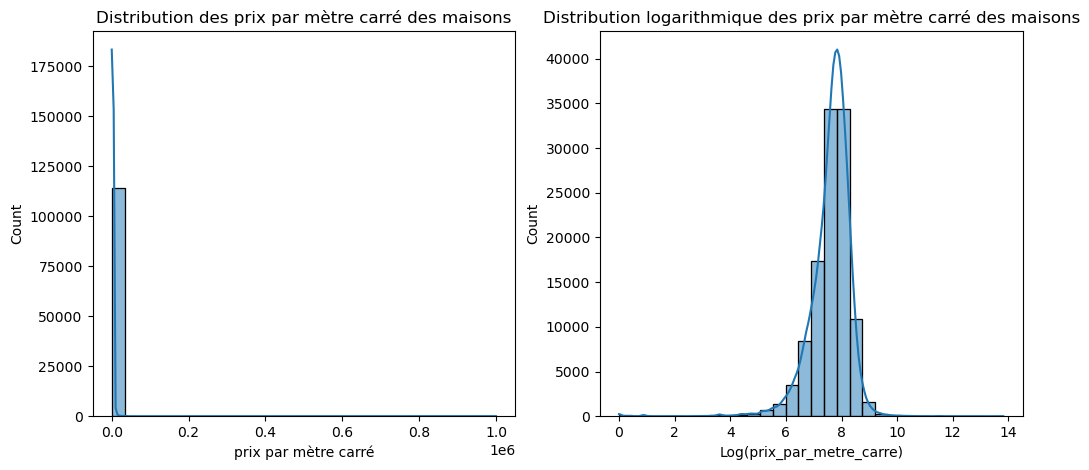

In [21]:
def visualiser_distributions(df):
    """
    Affiche des graphiques de distribution pour les variables prix_maison et surface_terrain.
    :param df: DataFrame contenant les données
    """
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df['prix_par_metre_carre'], bins=30, kde=True)
    plt.title("Distribution des prix par mètre carré des maisons")
    plt.xlabel("prix par mètre carré")
    
    plt.subplot(1, 2, 2)
    sns.histplot(np.log1p(df['prix_par_metre_carre']), bins=30, kde=True)
    plt.title("Distribution logarithmique des prix par mètre carré des maisons")
    plt.xlabel("Log(prix_par_metre_carre)")
    
    plt.show()

visualiser_distributions(df_sans_vide)


On supprime les observations ayant une valeur extrême (les 2% plus petits et plus grands) pour la variable prix_par_metre_carre

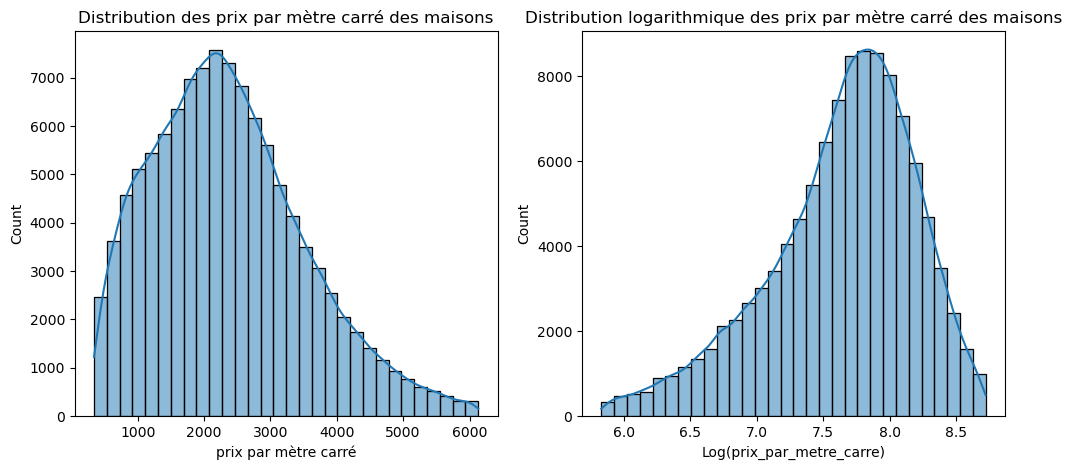

In [24]:
def supprimer_valeurs_aberrantes(df):
    """
    Supprime les 2% les plus faibles et les plus élevés des observations sur la variable prix_par_metre_carre.
    :param df: DataFrame contenant les données
    :return: DataFrame sans les valeurs aberrantes
    """
    quantiles = df['prix_par_metre_carre'].quantile([0.02, 0.98])
    df = df[(df['prix_par_metre_carre'] >= quantiles.iloc[0]) & (df['prix_par_metre_carre'] <= quantiles.iloc[1])]
    return df

df_v2 = supprimer_valeurs_aberrantes(df_sans_vide)


visualiser_distributions(df_v2)

Pas mal non ?

## Partie 3 : Une deuxième analyse


Maintenant que nous avons fait ce nettoyage, on espère avoir supprimé les transactions aberrantes de notre base de données. Pour vérifier cela, on va reprendre nos fonctions de statistiques descriptives pour voir les valeurs minimales et maximales des variables quantitatives.
Une fois cela fait, on analysera par département nos variables pour voir s'il y a des différences significatives entre départements

In [26]:
statistiques_generales(df_v2)

,Unnamed: 0,numero_disposition,valeur_fonciere,adresse_numero,code_postal,code_departement,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,prix_maison,nombre_dependances,prix_par_metre_carre
count,109300.000000,109300.000000,1.093000e+05,108562.000000,109298.000000,109300.000000,109300.000000,109300.000000,109300.000000,109300.000000,109300.000000,1.093000e+05,109300.000000,109300.000000
mean,57599.951638,1.012470,2.786053e+05,874.985105,27525.983595,27.147109,99.537210,4.029588,572.805544,3.542212,43.573424,2.376250e+05,0.363230,2372.396613
std,33241.140184,0.121066,4.637161e+05,2071.881188,9335.159930,9.279541,43.289974,1.374351,2015.010115,0.736362,0.336036,1.613888e+05,0.888203,1155.468042
min,0.000000,1.000000,5.000000e+03,1.000000,11000.000000,11.000000,1.000000,0.000000,2.000000,1.705680,42.714337,5.105058e+02,0.000000,339.622642
25%,28889.750000,1.000000,1.366000e+05,7.000000,30000.000000,30.000000,74.000000,3.000000,142.000000,3.042148,43.304107,1.250000e+05,0.000000,1502.699905
50%,57574.500000,1.000000,2.200000e+05,21.000000,30640.000000,30.000000,93.000000,4.000000,374.000000,3.601355,43.568449,2.100000e+05,0.000000,2256.410256
75%,86390.250000,1.000000,3.230000e+05,159.000000,34360.000000,34.000000,118.000000,5.000000,602.000000,4.136541,43.821134,3.100000e+05,0.000000,3076.923077
max,115302.000000,8.000000,8.500000e+06,9999.000000,34990.000000,34.000000,1340.000000,70.000000,45191.000000,4.832846,44.444393,2.549500e+06,27.000000,6132.075472


On remarque plusieurs choses, déjà le nombre d'observations est passé de 113856 à 109300 ce qui est parfaitement cohérent car 113856 * 0.96 = 109300.

On a toujours plus de 75% des transactions sans dépendance mais le maximum est passé de 160 à 27

Mais on a toujours des transactions... surprenantes ! Par exemple, une avec une surface totale de 2m ou encore une avec un prix de vente de 510€...

In [34]:
def compter_surface_inferieure_bati(df):
    """
    Compte le nombre d'observations où la surface du terrain est inférieure stricte à la surface réelle bâtie.
    :param df: DataFrame contenant les données
    :return: Nombre d'observations correspondantes
    """
    return (df['surface_terrain'] < df['surface_reelle_bati']).sum()

def compter_surface_egale_bati(df):
    """
    Compte le nombre d'observations où la surface du terrain est inférieure stricte à la surface réelle bâtie.
    :param df: DataFrame contenant les données
    :return: Nombre d'observations correspondantes
    """
    return (df['surface_terrain'] == df['surface_reelle_bati']).sum()

def compter_surface_superieur_bati(df):
    """
    Compte le nombre d'observations où la surface du terrain est inférieure stricte à la surface réelle bâtie.
    :param df: DataFrame contenant les données
    :return: Nombre d'observations correspondantes
    """
    return (df['surface_terrain'] > df['surface_reelle_bati']).sum()



print(compter_surface_inferieure_bati(df_v2))

print(compter_surface_egale_bati(df_v2))

print(compter_surface_superieur_bati(df_v2))

15399
803
93098


In [27]:
def trouver_surface_minimale(df, surface_minimale=2):
    """
    Trouve les lignes où la surface du terrain est égale à une valeur spécifique.
    :param df: DataFrame contenant les données
    :param surface_minimale: Valeur spécifique de la surface à rechercher (par défaut : 2)
    :return: DataFrame avec les lignes correspondantes
    """
    result = df[df['surface_terrain'] == surface_minimale]
    return result


resultat = trouver_surface_minimale(df_v2)
print(resultat)

       Unnamed: 0  id_mutation date_mutation  numero_disposition  \
19128       19128  2020-368524    2020-08-18                   1   
39026       39026  2021-135202    2021-10-19                   1   
41724       41724  2021-437381    2021-03-18                   1   

      nature_mutation  valeur_fonciere  adresse_numero adresse_suffixe  \
19128           Vente         220000.0            15.0             NaN   
39026           Vente         151600.0             3.0             NaN   
41724           Vente         160000.0            70.0             NaN   

        adresse_nom_voie adresse_code_voie  ...         nom_commune  \
19128          RUE HOCHE              0250  ...       Aigues-Mortes   
39026  RUE LOUIS BRAILLE              0992  ...  Lézignan-Corbières   
41724   CHE DES MATTETES              0440  ...            Monoblet   

      code_departement  surface_reelle_bati  nombre_pieces_principales  \
19128               30                 90.0                        3.0 

In [30]:
mode_colonnes(df_v2)

Unnamed: 0                             0
id_mutation                  2021-132350
date_mutation                 2021-07-28
numero_disposition                   1.0
nature_mutation                    Vente
valeur_fonciere                 200000.0
adresse_numero                       2.0
adresse_suffixe                        B
adresse_nom_voie              LE VILLAGE
adresse_code_voie                   0020
code_postal                      34500.0
nom_commune                        Nîmes
code_departement                    34.0
surface_reelle_bati                 90.0
nombre_pieces_principales            4.0
surface_terrain                    500.0
longitude                       3.049139
latitude                       43.013674
prix_maison                     200000.0
nombre_dependances                   0.0
prix_par_metre_carre              2000.0
Name: 0, dtype: object

In [ ]:
def filtrer_par_departement_et_commune(df, departement=None, commune=None):
    """
    Filtre le DataFrame par département et/ou commune.
    :param df: DataFrame contenant les données
    :param departement: Code du département (facultatif)
    :param commune: Nom de la commune (facultatif)
    :return: DataFrame filtré
    """
    if departement:
        df = df[df['code_departement'] == departement]
    if commune:
        df = df[df['nom_commune'] == commune]
    return df